In [84]:
import pandas as pd 
import numpy as np

In [85]:
train=pd.read_csv("C:\\Users\\AKANSHA SHARMA\Desktop\\Data Science Project 1\\train (1).csv")


In [86]:
test=pd.read_csv("C:\\Users\\AKANSHA SHARMA\Desktop\\Data Science Project 1\\test (1).csv")

In [87]:
count=0
for col in train.columns:
  if col not in ["Loan_ID","Gender","Married","Dependents","Education","Self_Employed","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History","Property_Area","Loan_Status"]:
    for val in test[col].unique():
      if val not in train[col].unique():
        print(col,val)
        count+=1

In [88]:
train["train"]=1
test["test"]=0
data=pd.concat([train,test],axis=0).reset_index(drop= True)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,train,test
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1.0,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1.0,NaN
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1.0,NaN
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1.0,NaN
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1.0,NaN


In [89]:
df=pd.DataFrame(data)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,train,test
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1.0,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1.0,NaN
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1.0,NaN
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1.0,NaN
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1.0,NaN


In [90]:
import numpy as np

In [91]:
df["Gender"]=df["Gender"].replace(to_replace=np.NaN,value='Male')
df['Married']=df["Married"].replace(to_replace=np.NaN,value='Yes')

df['Education']=df["Education"].replace(to_replace=np.NaN,value='Graduate')

df['Self_Employed']=df["Self_Employed"].replace(to_replace=np.NaN,value='No')
df["Property_Area"]=df["Property_Area"].replace(to_replace=np.NaN,value='Semiurban')
df["Credit_History"]=df["Credit_History"].replace(to_replace=np.NaN,value=1.0)

df["Dependents"]=df["Dependents"].replace(to_replace='3+',value=4)
df["Dependents"]=df["Dependents"].replace(to_replace=np.NaN,value=0)
df["Dependents"]=df["Dependents"].astype(float)




In [92]:
df.shape

(981, 15)

In [93]:
##knn imputation 

from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=2)
df['LoanAmount']=imputer.fit_transform(df[['LoanAmount']])
df['Loan_Amount_Term']=imputer.fit_transform(df[['Loan_Amount_Term']])



In [94]:
df.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
train                367
test                 614
dtype: int64

In [95]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
A=df.iloc[:,[1,2,4,5,11]]
A=A.astype(str)
B = A.apply(preprocessing.LabelEncoder().fit_transform)
B

,Gender,Married,Education,Self_Employed,Property_Area
0,1,0,0,0,2
1,1,1,0,0,0
2,1,1,0,1,2
3,1,1,1,0,2
4,1,0,0,0,2
...,...,...,...,...,...
976,1,1,1,1,2
977,1,1,0,0,2
978,1,0,0,0,1
979,1,1,0,0,0


In [96]:
C =df.drop(["Loan_ID",'Gender','Married','Education','Self_Employed','Property_Area','Loan_Status'],axis=1)
df1=pd.concat([B,C],axis=1)
df1.head()

,Gender,Married,Education,Self_Employed,Property_Area,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,train,test
0,1,0,0,0,2,0.0,5849,0.0,142.51153,360.0,1.0,1.0,NaN
1,1,1,0,0,0,1.0,4583,1508.0,128.00000,360.0,1.0,1.0,NaN
2,1,1,0,1,2,0.0,3000,0.0,66.00000,360.0,1.0,1.0,NaN
3,1,1,1,0,2,0.0,2583,2358.0,120.00000,360.0,1.0,1.0,NaN
4,1,0,0,0,2,0.0,6000,0.0,141.00000,360.0,1.0,1.0,NaN


In [97]:
df1.describe()

,Gender,Married,Education,Self_Employed,Property_Area,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,train,test
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.00000,981.000000,981.000000,614.0,367.0
mean,0.814475,0.646279,0.222222,0.121305,1.053007,0.860347,5179.795107,1601.916330,142.51153,342.201873,0.849134,1.0,0.0
std,0.388921,0.478368,0.415952,0.326648,0.801302,1.249436,5695.104533,2718.772806,76.34777,64.432886,0.358101,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.00000,6.000000,0.000000,1.0,0.0
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2875.000000,0.000000,101.00000,360.000000,1.000000,1.0,0.0
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3800.000000,1110.000000,128.00000,360.000000,1.000000,1.0,0.0
75%,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000,5516.000000,2365.000000,160.00000,360.000000,1.000000,1.0,0.0
max,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,81000.000000,41667.000000,700.00000,480.000000,1.000000,1.0,0.0


In [98]:
df1['App_co_Income_mean']=(df1['ApplicantIncome']+df1['CoapplicantIncome'])/2
df1['Total_Income_sum']=(df1['ApplicantIncome']+df1['CoapplicantIncome']) #addition of applicant and coapplicat income 
df1['App_co_Income_sub']=(df1['ApplicantIncome']-df1['CoapplicantIncome'])

df1["applicant_income_prercent"]=(df1['ApplicantIncome']/df1['Total_Income_sum']) #percentage of applicant income w.rt totalincome  
df1["Coapplicant_income_precent"]=(df1['CoapplicantIncome']/df1['Total_Income_sum']) #% of coapplicant income w.rt my total income 


df1['LoanAmount_bins']=pd.cut(df1['LoanAmount'], bins=[0,9,101,128,160,700], labels=[0,1,2,3,4])
df1['LoanAmount_bins']=df1['LoanAmount_bins'].astype(float)



##for each state each gender we have selected ['income'] and computed its mean
##for each state each gender we have selected ['eg category  feature'] and computed its count

df1['Gender_AppIncome_mean']=df1.groupby("ApplicantIncome")['Gender'].transform("mean")
df1['Gender_Loan_mean']=df1.groupby("LoanAmount")['Gender'].transform("mean")
df1['Gender_CoInc_mean']=df1.groupby("CoapplicantIncome")['Gender'].transform("mean")



df1['Gender_Property_count']=df1.groupby("Property_Area")['Gender'].transform("count")
df1['Gender_Education_count']=df1.groupby("Education")['Gender'].transform("count")
df1['Gender_CreditHist_count']=df1.groupby("Credit_History")['Gender'].transform("count")
df1['Gender_Married_count']=df1.groupby("Married")['Gender'].transform("count")


df1['Married_Property_count']=df1.groupby("Property_Area")['Married'].transform("count")
df1['Married_Education_count']=df1.groupby("Education")['Married'].transform("count")
df1['Married_CreditHist_count']=df1.groupby("Credit_History")['Married'].transform("count")

df1['Married_AppIncome_mean']=df1.groupby("ApplicantIncome")['Married'].transform("mean")
df1['Married_Loan_mean']=df1.groupby("LoanAmount")['Married'].transform("mean")
df1['Married_CoInc_mean']=df1.groupby("CoapplicantIncome")['Married'].transform("mean")


df1['Education_Property_count']=df1.groupby("Property_Area")['Education'].transform("count")
df1['Education_CreditHist_count']=df1.groupby("Credit_History")['Education'].transform("count")

df1['Education_AppIncome_mean']=df1.groupby("ApplicantIncome")['Education'].transform("mean")
df1['Education_Loan_mean']=df1.groupby("LoanAmount")['Education'].transform("mean")


df1['Property_CreditHist_count']=df1.groupby("Credit_History")['Property_Area'].transform("count")

df1['Property_AppIncome_mean']=df1.groupby("ApplicantIncome")['Property_Area'].transform("mean")
df1['Property_Loan_mean']=df1.groupby("LoanAmount")['Property_Area'].transform("mean")
df1['Property_CoInc_mean']=df1.groupby("CoapplicantIncome")['Property_Area'].transform("mean")


df1['CreditHist_AppIncome_mean']=df1.groupby("ApplicantIncome")['Credit_History'].transform("mean")
df1['CreditHist_Loan_mean']=df1.groupby("LoanAmount")['Credit_History'].transform("mean")




df1['LoanAmt_term_Loan_mean']=df1.groupby("LoanAmount")['Loan_Amount_Term'].transform("mean")
df1['LoanAmt_term_CoInc_mean']=df1.groupby("CoapplicantIncome")['Loan_Amount_Term'].transform("mean")


















In [99]:
y=df.iloc[:614,12]

In [100]:

label_encoder=preprocessing.LabelEncoder()
y=label_encoder.fit_transform(y)
y
Y_df=pd.DataFrame(y)
Y_df.rename(columns={0 :'Loan_Status'}, inplace=True)




In [101]:
Y_df

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [102]:
Y_train=pd.DataFrame(y)
Y_train

,0
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [103]:
X=df1[df1["train"]==1]
X=X.drop(['test','train'],axis=1)
X


,Gender,Married,Education,Self_Employed,Property_Area,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Education_AppIncome_mean,Education_Loan_mean,Property_CreditHist_count,Property_AppIncome_mean,Property_Loan_mean,Property_CoInc_mean,CreditHist_AppIncome_mean,CreditHist_Loan_mean,LoanAmt_term_Loan_mean,LoanAmt_term_CoInc_mean
0,1,0,0,0,2,0.0,5849,0.0,142.51153,360.0,...,0.000000,0.296296,833,2.000000,1.222222,1.062937,1.000000,0.814815,346.666667,341.5548
1,1,1,0,0,0,1.0,4583,1508.0,128.00000,360.0,...,0.000000,0.285714,833,0.714286,1.142857,0.000000,0.857143,0.857143,347.142857,360.0000
2,1,1,0,1,2,0.0,3000,0.0,66.00000,360.0,...,0.333333,0.400000,833,1.666667,0.800000,1.062937,0.666667,0.800000,372.000000,341.5548
3,1,1,1,0,2,0.0,2583,2358.0,120.00000,360.0,...,0.500000,0.275862,833,1.000000,0.931034,2.000000,1.000000,0.931034,346.358750,360.0000
4,1,0,0,0,2,0.0,6000,0.0,141.00000,360.0,...,0.000000,0.000000,833,1.000000,1.333333,1.062937,1.000000,1.000000,360.000000,341.5548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0.0,2900,0.0,71.00000,360.0,...,0.000000,0.000000,833,0.000000,1.500000,1.062937,1.000000,0.666667,380.000000,341.5548
610,1,1,0,0,0,4.0,4106,0.0,40.00000,180.0,...,0.000000,0.000000,833,0.000000,1.000000,1.062937,1.000000,1.000000,252.000000,341.5548
611,1,1,0,0,2,1.0,8072,240.0,253.00000,360.0,...,0.000000,0.000000,833,2.000000,2.000000,2.000000,1.000000,1.000000,360.000000,360.0000
612,1,1,0,0,2,2.0,7583,0.0,187.00000,360.0,...,0.000000,0.142857,833,2.000000,1.000000,1.062937,1.000000,0.857143,356.295327,341.5548


In [104]:
X1=X.iloc[:,:]
X1.isnull().sum()

Gender                        0
Married                       0
Education                     0
Self_Employed                 0
Property_Area                 0
Dependents                    0
ApplicantIncome               0
CoapplicantIncome             0
LoanAmount                    0
Loan_Amount_Term              0
Credit_History                0
App_co_Income_mean            0
Total_Income_sum              0
App_co_Income_sub             0
applicant_income_prercent     0
Coapplicant_income_precent    0
LoanAmount_bins               0
Gender_AppIncome_mean         0
Gender_Loan_mean              0
Gender_CoInc_mean             0
Gender_Property_count         0
Gender_Education_count        0
Gender_CreditHist_count       0
Gender_Married_count          0
Married_Property_count        0
Married_Education_count       0
Married_CreditHist_count      0
Married_AppIncome_mean        0
Married_Loan_mean             0
Married_CoInc_mean            0
Education_Property_count      0
Educatio

<AxesSubplot:xlabel='Gender', ylabel='count'>

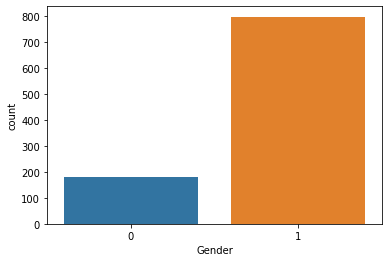

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns 

##univariate analysis 
sns.countplot(df1.Gender)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

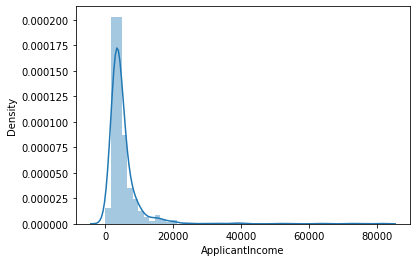

In [106]:
sns.distplot(df1.ApplicantIncome)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

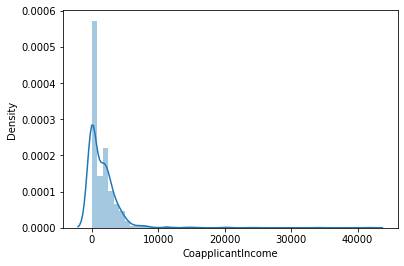

In [107]:
sns.distplot(df1.CoapplicantIncome)

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

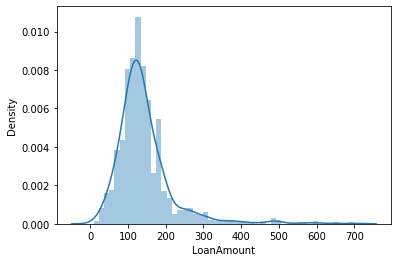

In [108]:
sns.distplot(df1.LoanAmount)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

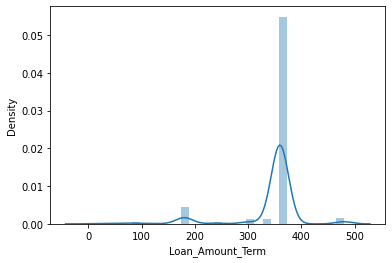

In [109]:
sns.distplot(df1.Loan_Amount_Term)

In [110]:
##correlation
df_corr=pd.concat([X1,Y_df],axis=1)
df_corr.head()

,Gender,Married,Education,Self_Employed,Property_Area,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Education_Loan_mean,Property_CreditHist_count,Property_AppIncome_mean,Property_Loan_mean,Property_CoInc_mean,CreditHist_AppIncome_mean,CreditHist_Loan_mean,LoanAmt_term_Loan_mean,LoanAmt_term_CoInc_mean,Loan_Status
0,1,0,0,0,2,0.0,5849,0.0,142.51153,360.0,...,0.296296,833,2.000000,1.222222,1.062937,1.000000,0.814815,346.666667,341.5548,1
1,1,1,0,0,0,1.0,4583,1508.0,128.00000,360.0,...,0.285714,833,0.714286,1.142857,0.000000,0.857143,0.857143,347.142857,360.0000,0
2,1,1,0,1,2,0.0,3000,0.0,66.00000,360.0,...,0.400000,833,1.666667,0.800000,1.062937,0.666667,0.800000,372.000000,341.5548,1
3,1,1,1,0,2,0.0,2583,2358.0,120.00000,360.0,...,0.275862,833,1.000000,0.931034,2.000000,1.000000,0.931034,346.358750,360.0000,1
4,1,0,0,0,2,0.0,6000,0.0,141.00000,360.0,...,0.000000,833,1.000000,1.333333,1.062937,1.000000,1.000000,360.000000,341.5548,1


In [111]:
df_corr.corr()

,Gender,Married,Education,Self_Employed,Property_Area,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Education_Loan_mean,Property_CreditHist_count,Property_AppIncome_mean,Property_Loan_mean,Property_CoInc_mean,CreditHist_AppIncome_mean,CreditHist_Loan_mean,LoanAmt_term_Loan_mean,LoanAmt_term_CoInc_mean,Loan_Status
Gender,1.000000,0.364569,0.045364,-0.000525,-0.025752,0.165877,0.058809,0.082912,0.107727,-0.073573,...,-0.041030,0.009170,-0.033466,-0.058806,-0.050206,-0.026297,0.004316,-0.006280,-0.033191,0.017987
Married,0.364569,1.000000,0.012304,0.004489,0.004257,0.308408,0.051708,0.075948,0.147036,-0.100864,...,-0.028235,0.010938,-0.007455,-0.053375,0.016414,-0.014122,-0.017631,-0.051612,-0.021068,0.091478
Education,0.045364,0.012304,1.000000,-0.010383,-0.065243,0.059001,-0.140760,-0.062290,-0.167395,-0.077205,...,0.452089,-0.073658,-0.051119,-0.025948,-0.019582,-0.065257,-0.047312,-0.042966,-0.006445,-0.085884
Self_Employed,-0.000525,0.004489,-0.010383,1.000000,-0.030860,0.048028,0.127180,-0.016100,0.115242,-0.033941,...,-0.040066,-0.001550,0.012618,-0.049797,-0.014258,-0.005651,-0.001496,0.016370,-0.023829,-0.003700
Property_Area,-0.025752,0.004257,-0.065243,-0.030860,1.000000,-0.012006,-0.009500,0.010522,-0.045175,-0.077604,...,-0.004937,0.001963,0.879895,0.492031,0.672485,0.025619,0.016374,-0.038985,-0.089812,0.032112
Dependents,0.165877,0.308408,0.059001,0.048028,-0.012006,1.000000,0.134080,0.034780,0.170672,-0.101702,...,-0.027277,-0.047203,0.017437,0.003767,0.036862,-0.034603,-0.003038,-0.014378,-0.022563,0.002474
ApplicantIncome,0.058809,0.051708,-0.140760,0.127180,-0.009500,0.134080,1.000000,-0.116605,0.565606,-0.045257,...,-0.225242,-0.018615,0.004742,0.004272,-0.007476,-0.023496,0.005570,-0.054030,-0.005476,-0.004710
CoapplicantIncome,0.082912,0.075948,-0.062290,-0.016100,0.010522,0.034780,-0.116605,1.000000,0.188149,-0.059673,...,-0.085233,0.011134,0.022379,-0.003113,0.033050,-0.003938,-0.020941,-0.084704,-0.094866,-0.059187
LoanAmount,0.107727,0.147036,-0.167395,0.115242,-0.045175,0.170672,0.565606,0.188149,1.000000,0.038873,...,-0.360955,-0.001256,-0.027913,-0.061539,-0.064897,-0.026272,-0.005338,0.077528,0.016555,-0.035742
Loan_Amount_Term,-0.073573,-0.100864,-0.077205,-0.033941,-0.077604,-0.101702,-0.045257,-0.059673,0.038873,1.000000,...,-0.057127,0.000374,-0.096405,-0.019481,-0.112181,0.009200,-0.080044,0.510380,0.648956,-0.020992


In [112]:
X1.shape

(614, 42)

In [113]:
Y_train.head()

,0
0,1
1,0
2,1
3,1
4,1


In [114]:
X11=pd.DataFrame(X1)
X11

,Gender,Married,Education,Self_Employed,Property_Area,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Education_AppIncome_mean,Education_Loan_mean,Property_CreditHist_count,Property_AppIncome_mean,Property_Loan_mean,Property_CoInc_mean,CreditHist_AppIncome_mean,CreditHist_Loan_mean,LoanAmt_term_Loan_mean,LoanAmt_term_CoInc_mean
0,1,0,0,0,2,0.0,5849,0.0,142.51153,360.0,...,0.000000,0.296296,833,2.000000,1.222222,1.062937,1.000000,0.814815,346.666667,341.5548
1,1,1,0,0,0,1.0,4583,1508.0,128.00000,360.0,...,0.000000,0.285714,833,0.714286,1.142857,0.000000,0.857143,0.857143,347.142857,360.0000
2,1,1,0,1,2,0.0,3000,0.0,66.00000,360.0,...,0.333333,0.400000,833,1.666667,0.800000,1.062937,0.666667,0.800000,372.000000,341.5548
3,1,1,1,0,2,0.0,2583,2358.0,120.00000,360.0,...,0.500000,0.275862,833,1.000000,0.931034,2.000000,1.000000,0.931034,346.358750,360.0000
4,1,0,0,0,2,0.0,6000,0.0,141.00000,360.0,...,0.000000,0.000000,833,1.000000,1.333333,1.062937,1.000000,1.000000,360.000000,341.5548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0.0,2900,0.0,71.00000,360.0,...,0.000000,0.000000,833,0.000000,1.500000,1.062937,1.000000,0.666667,380.000000,341.5548
610,1,1,0,0,0,4.0,4106,0.0,40.00000,180.0,...,0.000000,0.000000,833,0.000000,1.000000,1.062937,1.000000,1.000000,252.000000,341.5548
611,1,1,0,0,2,1.0,8072,240.0,253.00000,360.0,...,0.000000,0.000000,833,2.000000,2.000000,2.000000,1.000000,1.000000,360.000000,360.0000
612,1,1,0,0,2,2.0,7583,0.0,187.00000,360.0,...,0.000000,0.142857,833,2.000000,1.000000,1.062937,1.000000,0.857143,356.295327,341.5548


In [115]:
Y11=pd.DataFrame(Y_df)
Y11

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [116]:
##smote

print("Before OverSampling ,count of label '1' :{}".format(sum(y==1)))
print("Before OverSampling ,count of label '0' :{}".format(sum(y==0)))


Before OverSampling ,count of label '1' :422
Before OverSampling ,count of label '0' :192


In [117]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=2)
xtrain1,ytrain1=sm.fit_resample(X11,Y11)

In [118]:
print("Before OverSampling ,count of label :{}".format(xtrain1.shape))
print("Before OverSampling ,count of label :{}".format(ytrain1.shape))


Before OverSampling ,count of label :(844, 42)
Before OverSampling ,count of label :(844, 1)


In [119]:
xtrain=pd.DataFrame(data=xtrain1, columns=X11.columns)
xtrain

,Gender,Married,Education,Self_Employed,Property_Area,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Education_AppIncome_mean,Education_Loan_mean,Property_CreditHist_count,Property_AppIncome_mean,Property_Loan_mean,Property_CoInc_mean,CreditHist_AppIncome_mean,CreditHist_Loan_mean,LoanAmt_term_Loan_mean,LoanAmt_term_CoInc_mean
0,1,0,0,0,2,0.000000,5849,0.000000,142.511530,360.000000,...,0.000000,0.296296,833,2.000000,1.222222,1.062937,1.000000,0.814815,346.666667,341.55480
1,1,1,0,0,0,1.000000,4583,1508.000000,128.000000,360.000000,...,0.000000,0.285714,833,0.714286,1.142857,0.000000,0.857143,0.857143,347.142857,360.00000
2,1,1,0,1,2,0.000000,3000,0.000000,66.000000,360.000000,...,0.333333,0.400000,833,1.666667,0.800000,1.062937,0.666667,0.800000,372.000000,341.55480
3,1,1,1,0,2,0.000000,2583,2358.000000,120.000000,360.000000,...,0.500000,0.275862,833,1.000000,0.931034,2.000000,1.000000,0.931034,346.358750,360.00000
4,1,0,0,0,2,0.000000,6000,0.000000,141.000000,360.000000,...,0.000000,0.000000,833,1.000000,1.333333,1.062937,1.000000,1.000000,360.000000,341.55480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,1,1,0,0,1,0.278109,3710,2668.006799,166.881602,360.000000,...,0.000000,0.180473,833,1.360946,0.652662,1.000000,1.000000,1.000000,366.674616,360.00000
840,0,0,1,0,0,0.000000,3393,0.000000,92.843463,313.418791,...,0.357827,0.321353,833,0.785942,1.059904,1.062937,0.785942,0.821353,322.006473,341.55480
841,1,0,0,0,1,0.000000,4680,2082.965664,143.508116,360.000000,...,0.000000,0.291692,833,1.000000,1.214664,1.000000,1.000000,0.819158,346.093264,360.00000
842,1,0,0,0,1,2.518275,3048,2248.649449,134.786314,271.096520,...,0.000000,0.366261,148,1.493908,1.408810,1.493908,0.000000,0.732521,286.688650,271.09652


In [120]:
ytrain=pd.DataFrame(data=ytrain1,columns=Y11.columns)
ytrain

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
839,0
840,0
841,0
842,0


In [121]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

In [122]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np


from lightgbm import LGBMClassifier  

In [123]:
x_test=df1[df1['test']==0]
test_data=x_test.drop(["train","test"],axis=1)
test_data

,Gender,Married,Education,Self_Employed,Property_Area,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Education_AppIncome_mean,Education_Loan_mean,Property_CreditHist_count,Property_AppIncome_mean,Property_Loan_mean,Property_CoInc_mean,CreditHist_AppIncome_mean,CreditHist_Loan_mean,LoanAmt_term_Loan_mean,LoanAmt_term_CoInc_mean
614,1,1,0,0,2,0.0,5720,0.0,110.0,360.0,...,0.000000,0.296296,833,2.000000,1.111111,1.062937,1.000000,0.888889,352.674143,341.5548
615,1,1,0,0,2,1.0,3076,1500.0,126.0,360.0,...,0.000000,0.375000,833,2.000000,1.000000,0.666667,1.000000,0.875000,337.500000,300.0000
616,1,1,0,0,2,2.0,5000,1800.0,208.0,360.0,...,0.000000,0.000000,833,0.636364,1.500000,1.000000,0.818182,1.000000,360.000000,360.0000
617,1,1,0,0,2,2.0,2340,2546.0,100.0,360.0,...,0.000000,0.291667,833,2.000000,1.208333,2.000000,1.000000,0.916667,346.758411,360.0000
618,1,0,1,0,2,0.0,3276,0.0,78.0,360.0,...,0.666667,0.333333,833,1.333333,1.666667,1.062937,1.000000,1.000000,300.000000,341.5548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,1,1,1,1,2,4.0,4009,1777.0,113.0,360.0,...,0.500000,0.357143,833,1.500000,1.142857,2.000000,1.000000,0.928571,347.142857,360.0000
977,1,1,0,0,2,0.0,4158,709.0,115.0,360.0,...,0.000000,0.400000,833,2.000000,1.100000,2.000000,1.000000,0.900000,340.220187,360.0000
978,1,0,0,0,1,0.0,3250,1993.0,126.0,360.0,...,0.000000,0.375000,833,0.666667,1.000000,1.000000,1.000000,0.875000,337.500000,360.0000
979,1,1,0,0,0,0.0,5000,2393.0,158.0,360.0,...,0.000000,0.333333,833,0.636364,1.222222,0.000000,0.818182,0.666667,353.333333,360.0000


In [124]:
df.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,train,test
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y,1.0,NaN


In [125]:
c=df[df["test"]==0]
c

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,train,test
614,LP001015,Male,Yes,0.0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,NaN,NaN,0.0
615,LP001022,Male,Yes,1.0,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,NaN,NaN,0.0
616,LP001031,Male,Yes,2.0,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,NaN,NaN,0.0
617,LP001035,Male,Yes,2.0,Graduate,No,2340,2546.0,100.0,360.0,1.0,Urban,NaN,NaN,0.0
618,LP001051,Male,No,0.0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,4.0,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN,NaN,0.0
977,LP002975,Male,Yes,0.0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN,NaN,0.0
978,LP002980,Male,No,0.0,Graduate,No,3250,1993.0,126.0,360.0,1.0,Semiurban,NaN,NaN,0.0
979,LP002986,Male,Yes,0.0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN,NaN,0.0


In [126]:
c=df[df["test"]==0]
cat=c.iloc[:,[1,2,4,5,11]]
cat.isnull().sum()

Gender           0
Married          0
Education        0
Self_Employed    0
Property_Area    0
dtype: int64

In [127]:
cat

,Gender,Married,Education,Self_Employed,Property_Area
614,Male,Yes,Graduate,No,Urban
615,Male,Yes,Graduate,No,Urban
616,Male,Yes,Graduate,No,Urban
617,Male,Yes,Graduate,No,Urban
618,Male,No,Not Graduate,No,Urban
...,...,...,...,...,...
976,Male,Yes,Not Graduate,Yes,Urban
977,Male,Yes,Graduate,No,Urban
978,Male,No,Graduate,No,Semiurban
979,Male,Yes,Graduate,No,Rural


In [128]:
test_data.head(1)

,Gender,Married,Education,Self_Employed,Property_Area,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Education_AppIncome_mean,Education_Loan_mean,Property_CreditHist_count,Property_AppIncome_mean,Property_Loan_mean,Property_CoInc_mean,CreditHist_AppIncome_mean,CreditHist_Loan_mean,LoanAmt_term_Loan_mean,LoanAmt_term_CoInc_mean
614,1,1,0,0,2,0.0,5720,0.0,110.0,360.0,...,0.0,0.296296,833,2.0,1.111111,1.062937,1.0,0.888889,352.674143,341.5548


In [143]:
df2=pd.DataFrame(test_data)


In [145]:
import pandas
df2= pd.DataFrame(test_data)
df2.to_csv("./testdata.csv", sep=',',index=False)

In [129]:
d=test_data.iloc[:,5:]
d

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,App_co_Income_mean,Total_Income_sum,App_co_Income_sub,applicant_income_prercent,...,Education_AppIncome_mean,Education_Loan_mean,Property_CreditHist_count,Property_AppIncome_mean,Property_Loan_mean,Property_CoInc_mean,CreditHist_AppIncome_mean,CreditHist_Loan_mean,LoanAmt_term_Loan_mean,LoanAmt_term_CoInc_mean
614,0.0,5720,0.0,110.0,360.0,1.0,2860.0,5720.0,5720.0,1.000000,...,0.000000,0.296296,833,2.000000,1.111111,1.062937,1.000000,0.888889,352.674143,341.5548
615,1.0,3076,1500.0,126.0,360.0,1.0,2288.0,4576.0,1576.0,0.672203,...,0.000000,0.375000,833,2.000000,1.000000,0.666667,1.000000,0.875000,337.500000,300.0000
616,2.0,5000,1800.0,208.0,360.0,1.0,3400.0,6800.0,3200.0,0.735294,...,0.000000,0.000000,833,0.636364,1.500000,1.000000,0.818182,1.000000,360.000000,360.0000
617,2.0,2340,2546.0,100.0,360.0,1.0,2443.0,4886.0,-206.0,0.478919,...,0.000000,0.291667,833,2.000000,1.208333,2.000000,1.000000,0.916667,346.758411,360.0000
618,0.0,3276,0.0,78.0,360.0,1.0,1638.0,3276.0,3276.0,1.000000,...,0.666667,0.333333,833,1.333333,1.666667,1.062937,1.000000,1.000000,300.000000,341.5548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,4.0,4009,1777.0,113.0,360.0,1.0,2893.0,5786.0,2232.0,0.692879,...,0.500000,0.357143,833,1.500000,1.142857,2.000000,1.000000,0.928571,347.142857,360.0000
977,0.0,4158,709.0,115.0,360.0,1.0,2433.5,4867.0,3449.0,0.854325,...,0.000000,0.400000,833,2.000000,1.100000,2.000000,1.000000,0.900000,340.220187,360.0000
978,0.0,3250,1993.0,126.0,360.0,1.0,2621.5,5243.0,1257.0,0.619874,...,0.000000,0.375000,833,0.666667,1.000000,1.000000,1.000000,0.875000,337.500000,360.0000
979,0.0,5000,2393.0,158.0,360.0,1.0,3696.5,7393.0,2607.0,0.676315,...,0.000000,0.333333,833,0.636364,1.222222,0.000000,0.818182,0.666667,353.333333,360.0000


(367, 42)

In [139]:
import pandas
df1 = pd.DataFrame(test_data)
df1.to_csv("./file11.csv", sep=',',index=False)

In [132]:
from lightgbm import LGBMClassifier 


In [133]:
def train_lgbm(xtrain,ytrain,test_data):
  num_split=10
  
  oof_preds=np.zeros(len(xtrain))
  predictions=np.zeros(len(test_data))
  features_importance= pd.DataFrame({'Feature':[], 'Importance':[]})
  excluded_features=["Loan_Status","Loan_ID","train","test"]
  train_features=[tf for tf in xtrain.columns if tf not in excluded_features]
  features_importance= pd.DataFrame({'Feature':[], 'Importance':[]})
  folds=StratifiedKFold(n_splits=10,shuffle=True,random_state=100)
  for folds, (train_index,test_index) in enumerate(folds.split(xtrain,ytrain)):
    print("folds:",folds)
    xtr=xtrain[train_features].iloc[train_index]
    xvl=xtrain[train_features].iloc[test_index]
    ytr=ytrain.iloc[train_index]
    yvl=ytrain.iloc[test_index]
   
    clf=LGBMClassifier(num_leaves=31,
              bagging_fraction=0.7,learning_rate=0.009, min_data=100,
              min_split_gain=1.0,max_depth=-1,min_child_weight=0.1,
              min_child_samples=20,subsample=0.95,reg_lamda=3.9,objective='binary', 
              metric='auc',n_estimators=1000,
              subsample_freq=0, colsample_bytree=0.9,reg_alpha=0.0085,
              importance_type='split',seed=100,n_jobs=-1,
              boosting_type='gbdt'
              )
    clf.fit(xtr,ytr, sample_weight=None, init_score=None, eval_set=(xvl,yvl), eval_names=None, 
              eval_sample_weight=None, eval_class_weight=None, eval_init_score=None,
              eval_metric='auc', early_stopping_rounds=300,
              verbose=False, feature_name=train_features,categorical_feature="auto",
             callbacks=None)
     
    num_split=10
    predictions =(clf.predict_proba(test_data[train_features], num_iteration=clf.best_iteration_)/num_split)[:,1]
    fold_importance_df=pd.DataFrame({'Feature':[], 'Importance':[]})
    fold_importance_df["folds"] = folds + 1
    fold_importance_df['Feature']= train_features
    fold_importance_df['Importance']= clf.booster_.feature_importance(importance_type='gain')
    features_importance = pd.concat([features_importance, fold_importance_df], axis=0)

    oof_preds[test_index]= clf.predict_proba(xvl, num_iteration=clf.best_iteration_)[:,1]
    print("roc_auc_score",roc_auc_score(yvl,oof_preds[test_index]))
    del xtr,ytr,train_index,test_index
    import gc
    gc.collect()

  print("roc_auc_score",roc_auc_score(ytrain,oof_preds))


  return predictions,features_importance,clf,oof_preds,ytrain
       

In [134]:
 
predictions,features_importance,clf,oof_preds,ytrain =train_lgbm(xtrain,ytrain,test_data)

folds: 0
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=100. Current value: min_data_in_leaf=100
[LightGBM] [Warning] Unknown parameter: reg_lamda
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.95 will be ignored. Current value: bagging_fraction=0.7
roc_auc_score 0.8953488372093024
folds: 1
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=100. Current value: min_data_in_leaf=100
[LightGBM] [Warning] Unknown parameter: reg_lamda
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.95 will be ignored. Current value: bagging_fraction=0.7
roc_auc_score 0.9473975636766335
folds: 2
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=100. Current value: min_data_in_leaf=100
[LightGBM] [Warning] Unknown parameter: reg_lamda
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.95 will be ignored. Current

In [135]:
import seaborn as sns
from matplotlib import pyplot as plt
def display_importances(features_importance):
    cols = features_importance[["Feature", "Importance"]].groupby("Feature").mean().sort_values(by="Importance", ascending=False)[:10].index
    best_features = features_importance[["Feature", "Importance"]].groupby("Feature").mean().sort_values(by="Importance", ascending=True)[:40]
    best_features.reset_index(inplace=True)
    print(best_features.dtypes)
    plt.figure(figsize=(8, 10))
    sns.barplot(x="Importance", y="Feature", data=best_features)
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()

Feature        object
Importance    float64
dtype: object


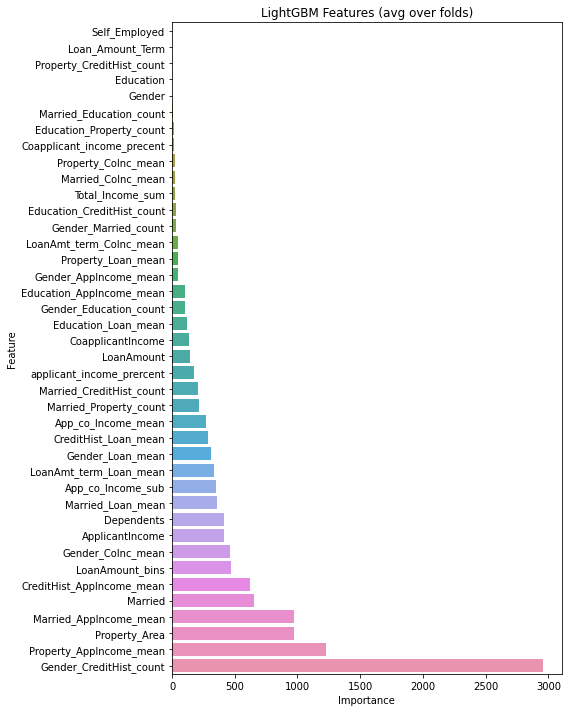

In [136]:
display_importances(features_importance)

In [137]:
import pickle

file=open('lgbm_model.pkl','wb')

In [138]:
pickle.dump(clf,file)